# Análisis de series de tiempo

Una serie de tiempo es simplemente una serie de puntos de datos ordenados en el tiempo. En una serie de tiempo, el tiempo es a menudo la variable independiente y el objetivo suele ser hacer un pronóstico para el futuro.






*   Tendencia: La tendencia muestra la tendencia general de los datos a aumentar o disminuir durante un largo período de tiempo. Una tendencia es una tendencia media suave, general, a largo plazo.

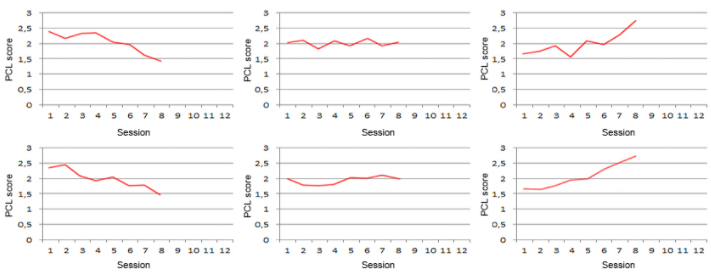

*   lag= Un "lag" es una cantidad fija de tiempo transcurrido; Un conjunto de observaciones en una serie de tiempo se grafica (lagged) contra un segundo conjunto de datos posterior. (lunes a martes lag =1, lunes a miercoles lag =2...)


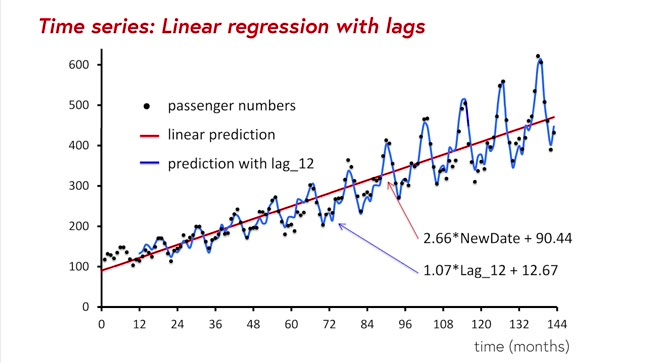

* Autocorrelación: Abajo hay un ejemplo de una gráfica de autocorrelación. Mirando de cerca, se da cuenta de que el primer valor y el valor 24 tienen una alta autocorrelación. De manera similar, las observaciones 12 y 36 están altamente correlacionadas. Esto significa que encontraremos un valor muy similar cada 24 unidades de tiempo.


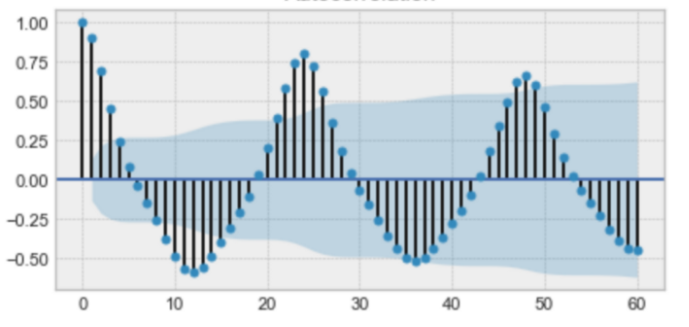


*   Estacionalidad (Seasonality):
 Estas son las fuerzas rítmicas que operan de manera regular y periódica durante un lapso de menos de un año. Tienen el mismo patrón o casi el mismo durante un período de 12 meses. Esta variación estará presente en una serie de tiempo si los datos se registran por hora, por día, por semana, por trimestre o por mes.

* Estacionario (Stationary): 
Una serie de tiempo estacionaria es aquella cuyas propiedades no dependen del momento en el que se observa la serie.Por tanto, las series de tiempo con tendencias, o con estacionalidad, no son estacionarias; la tendencia y la estacionalidad afectarán el valor de la serie de tiempo en tiempos diferentes. Por otro lado, una serie de ruido blanco es estacionaria; no importa cuando la observe, debería verse muy similar en cualquier momento.

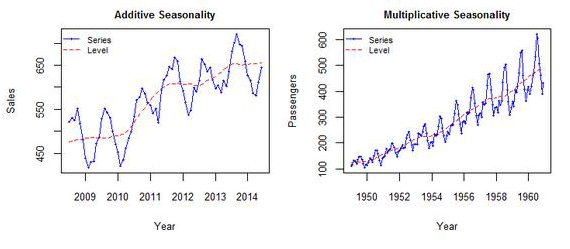

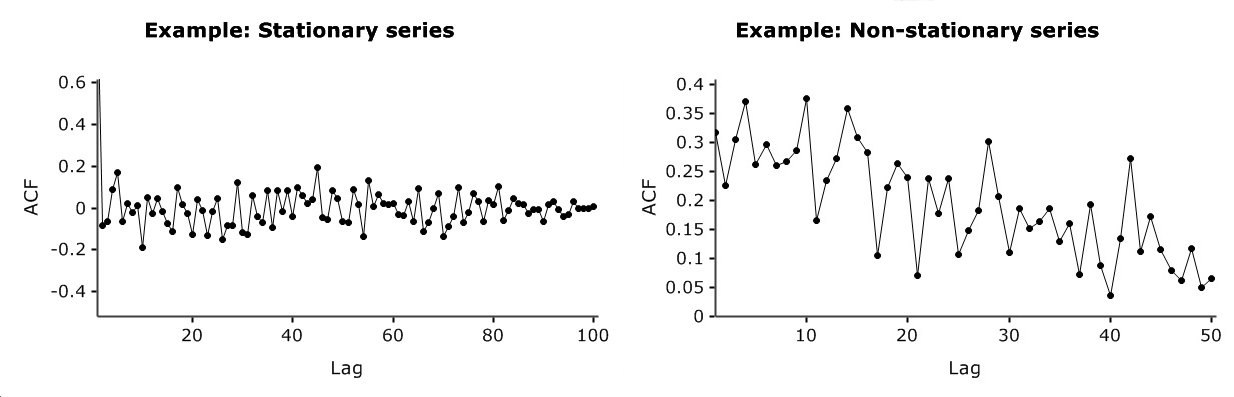



*   Residuo = Los "residuos" en un modelo de serie de tiempo son lo que queda después de ajustar un modelo. Para muchos (pero no todos) modelos de series de tiempo, los residuales son iguales a la diferencia entre las observaciones y el valor ajustado correspondiente. Los residuos son útiles para verificar si un modelo ha capturado adecuadamente la información en los datos.






# Augmented Dickey Fuller Test

Es una prueba de significancia estadísitca, es decir, tenemos una hipótesis nula involucrada con una alternativa y cuando se ejecuta el test, nos regresa el valor de p del cual podremos inferir si es o no es estacionario nuestro dataset.

Es muy importante saber si es estacionario o no para poder usar modelos autoregresivos para hacer nuestros Forecast basados en datos pasados.

La hipótesis nula de la prueba ADF es que la serie de tiempo no es estacionaria. Entonces, si el valor p de la prueba es menor que el nivel de significancia (0.05), entonces rechaza la hipótesis nula e infiere que la serie de tiempo es de hecho estacionaria.

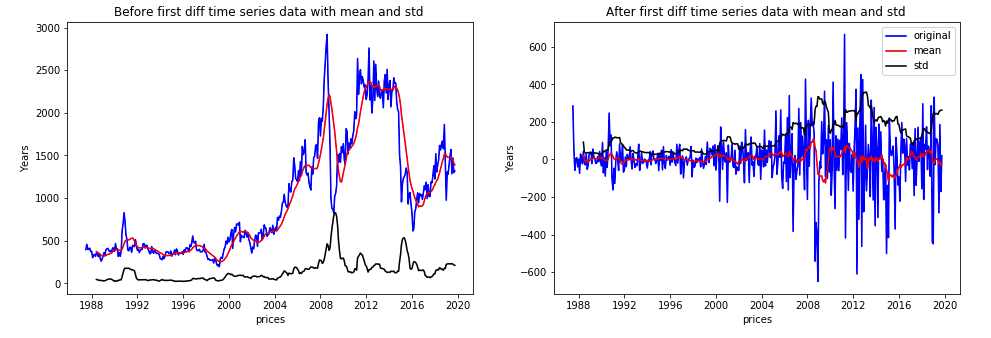

# ARIMA

Es el acrónimpo para 'Auto Regressive Integrated Moving Average' y nos permite estimar los valores siguientes basado en nuestros valores que ya tenemos.

Es un modelo de regresión lineal que usa sus propios "lags" como predictores.

El primer paso para trabajar con ARIMA es tener nuestra serie de tiempo estacionarios. Si es estacionario, entonde d = 0, sino se deberan buscar métodos para hacerlo estacionario (obtener diferencia entre los valores), este incrementaría nuestra d.

Si una serie de tiempo tiene patrones estacionales, entonces necesita agregar términos estacionales y se convierte en SARIMA, abreviatura de "Seasonal ARIMA".



# SARIMAX
* S - Stationality \\
* AR - Autorregressive(puede ser una regresión simple, múltiple o no lineal)
* I - Intgrated
* MA - Moving Average (Los modelos de media móvil pueden utilizar 
factores de ponderación, donde las observaciones se ponderan por un factor 
de recorte (para los datos más antiguos de la serie) y con un peso más alto 
para las observaciones más recientes.)

Parametros estacionales SARIMA \\

* p = Lag Orders, es la parte autorregresiva del modelo. Nos permite incorporar el efecto de valores pasados en nuestro modelo. Intuitivamente, esto sería similar a afirmar que es probable que haga calor mañana si ha estado caliente los últimos 3 días. \\
* d = Orden de diferenciación, es la parte integrada del modelo. Esto incluye términos en el modelo que incorporan la cantidad de diferenciación (es decir, el número de puntos de tiempo pasado que se restarán del valor actual) para aplicar a la serie de tiempo. Intuitivamente, esto sería similar a afirmar que es probable que mañana tenga la misma temperatura si la diferencia de temperatura en los últimos tres días ha sido muy pequeña. \\
* q = Tamaño de la ventana de media móvil, es la parte de media móvil del modelo. Esto nos permite establecer el error de nuestro modelo como una combinación lineal de los valores de error observados en puntos de tiempo anteriores en el pasado,estacionalidad, tendencia y ruido en los datos.


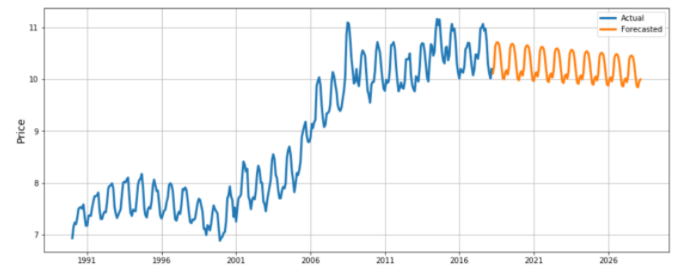

# Code

In [ ]:
import itertools 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Databases/Week 14/Superstore.xls')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
tech = df[df['Category'] =='Technology']

In [ ]:
tech['Category'].unique()

array(['Technology'], dtype=object)

In [ ]:
tech['Order Date'].min(), tech['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
tech = tech[['Order Date','Sales']]

In [ ]:
tech.head()

,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
35,2016-12-08,1097.544


In [ ]:
tech = tech.groupby(['Order Date'], as_index=True).sum()

In [ ]:
tech.head()

,Sales
Order Date,
2014-01-06,1147.94
2014-01-09,31.20
2014-01-13,646.74
2014-01-15,149.95
2014-01-16,124.20


In [ ]:
# Month Start, M month, 
tech_ms = tech['Sales'].resample('MS').sum()

In [ ]:
tech_ms['2014':]

Order Date
2014-01-01     3143.290
2014-02-01     1608.510
2014-03-01    32511.174
2014-04-01     9195.434
2014-05-01     9599.876
2014-06-01     8435.965
2014-07-01     8004.134
2014-08-01     9209.660
2014-09-01    30537.572
2014-10-01    11938.018
2014-11-01    30201.408
2014-12-01    20893.192
2015-01-01     4625.354
2015-02-01     3448.970
2015-03-01    10343.922
2015-04-01    11160.952
2015-05-01    11643.000
2015-06-01     6435.366
2015-07-01    10370.966
2015-08-01    15524.632
2015-09-01    19017.128
2015-10-01    10704.890
2015-11-01    23873.601
2015-12-01    35632.028
2016-01-01     5620.066
2016-02-01    12258.914
2016-03-01    21567.852
2016-04-01    14890.502
2016-05-01    28832.691
2016-06-01    16372.152
2016-07-01    13269.000
2016-08-01     9672.402
2016-09-01    22883.406
2016-10-01    31533.374
2016-11-01    27141.059
2016-12-01    22322.762
2017-01-01    16733.053
2017-02-01     6027.024
2017-03-01    33428.622
2017-04-01    12383.387
2017-05-01    13566.588
2017-

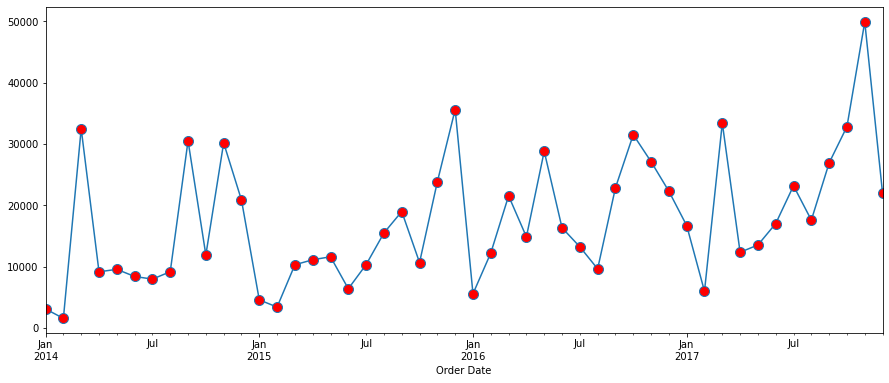

In [ ]:
import matplotlib
fig = plt.figure(facecolor='w')
tech_ms.plot(figsize=(15,6), marker = "o", markersize=10,markerfacecolor='red')

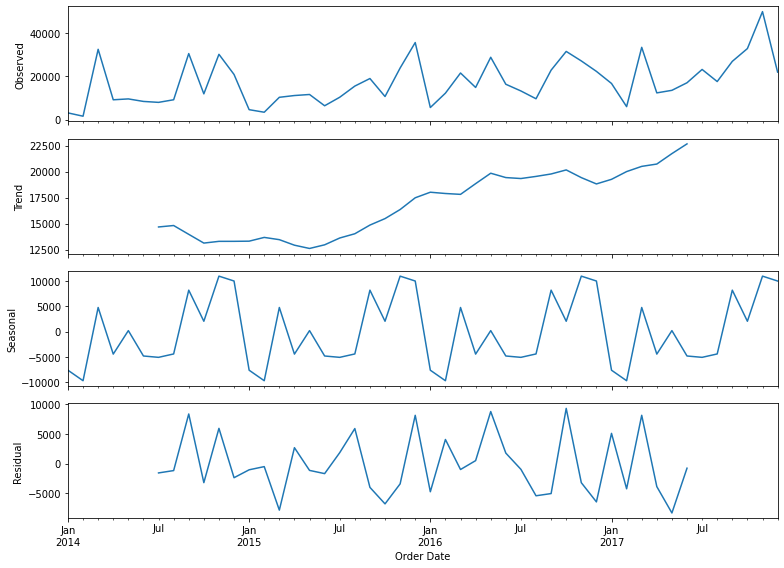

In [ ]:
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize']=11,8
decomposition = sm.tsa.seasonal_decompose(tech_ms, model = 'additive')
fig = decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Los datos son estacionarios?')
dftest = adfuller(tech.Sales, autolag = None)
print(f'Prueba estadistica{dftest[0]}')
print(f'P-value={dftest[1]}')
print(f'Valores criticos:')
for k, v in dftest[4].items():
    print('\t{}:{} Los datos son {} estacionarios con {}% de confianza'.format(k, v, "not" if v < dftest[0] else "", 100-int(k[:-1])))

Los datos son estacionarios?
Prueba estadistica-6.041296207058879
P-value=1.344014066832414e-07
Valores criticos:
	1%:-3.4385299921076995 Los datos son  estacionarios con 99% de confianza
	5%:-2.8651505256266865 Los datos son  estacionarios con 95% de confianza
	10%:-2.568692571687987 Los datos son  estacionarios con 90% de confianza


In [ ]:
dftest

(-6.041296207058879,
 1.344014066832414e-07,
 21,
 802,
 {'1%': -3.4385299921076995,
  '10%': -2.568692571687987,
  '5%': -2.8651505256266865})

- Valor crítico: -6
- p-value= .00000013
- numero de lags 21
- nUmero de observaciones = 802

- Si nosotros tenemos un valor crísitco de -6< -3.43 <-2.86 <-2.56 la hipotesis nula puede ser rechazada
- LO que nos dice el p value es  que .000000013 < .01 y por ello podemos decir que H0 es rechazada con 99% de confianza

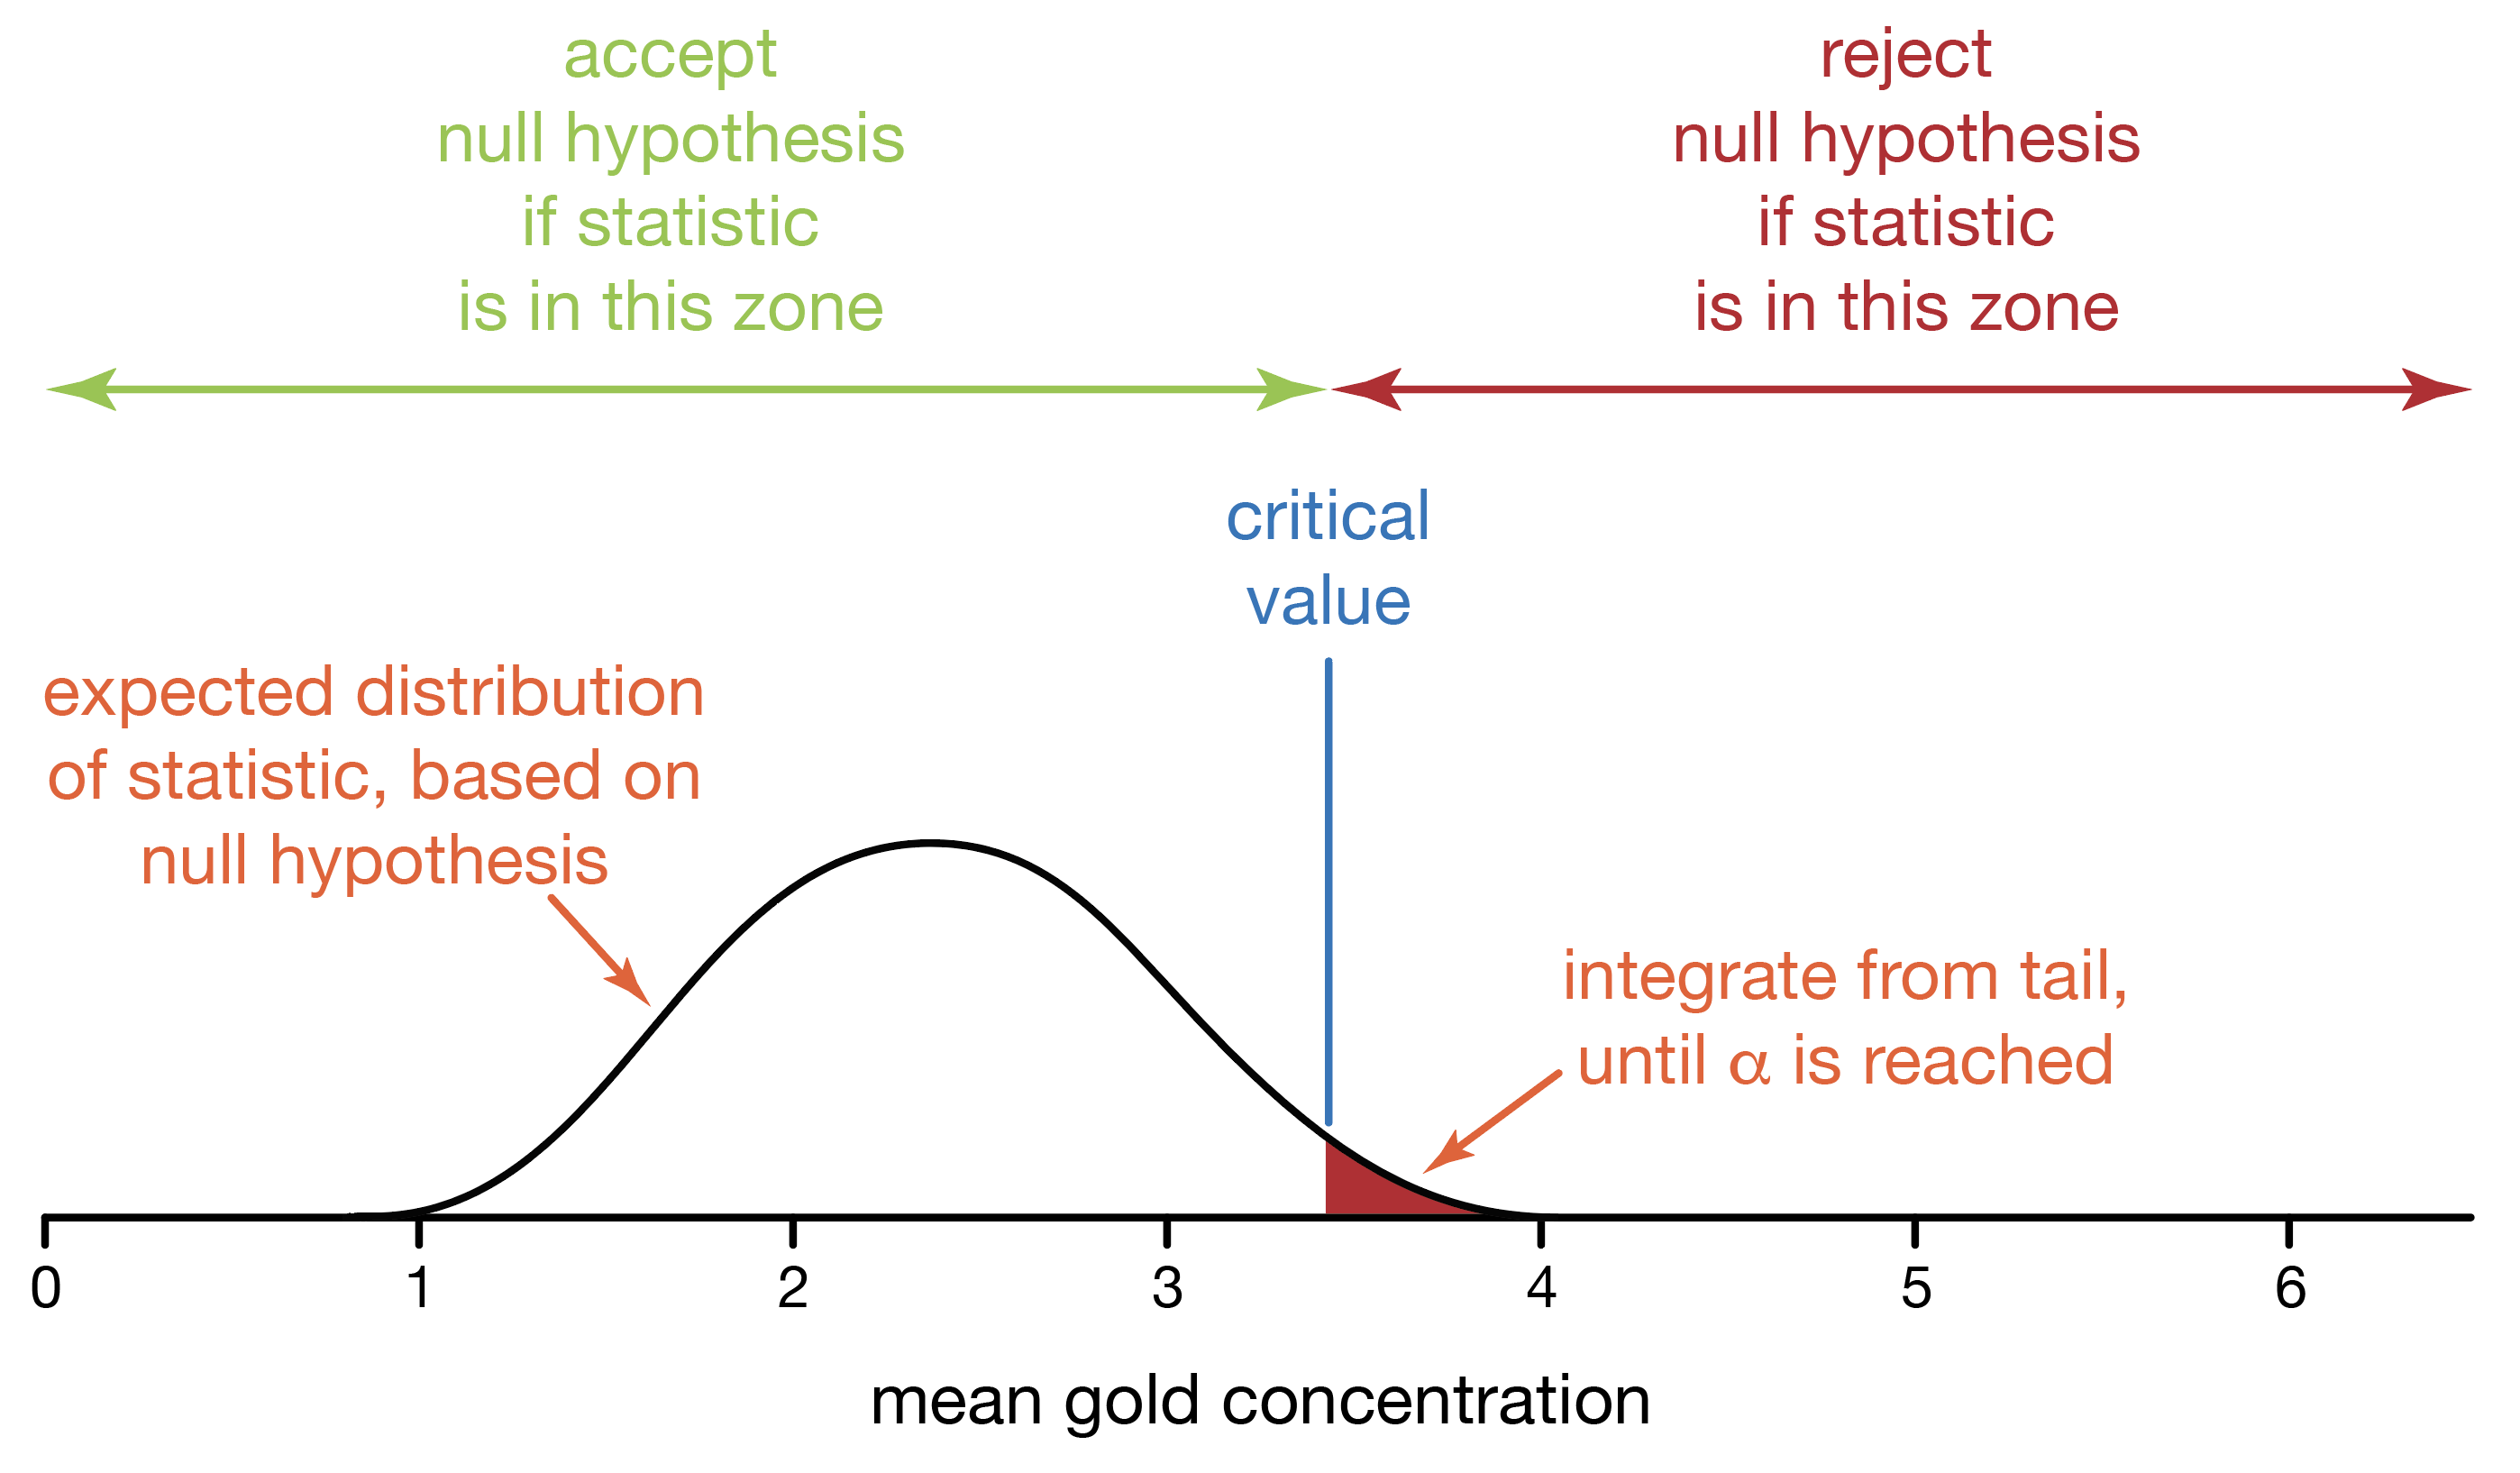

In [ ]:
p = d = q = range(0,2)
# AIC(Arkaike Information Criteria)
# Este estimador nos permite encontrar los mejores parámetros para Sarimax
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list( itertools.product(p,d,q))]
print(f'Sarimax: {pdq[1]} x {seasonal_pdq[1]}')

Sarimax: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
for param in pdq:
  for param_estacional in seasonal_pdq:
    try:
      mod= sm.tsa.statespace.SARIMAX(
          tech_ms,
          order=param,
          seasonal_order=param_estacional,
          enforce_stationarity = False
      )
      results = mod.fit()
      print(f'ARIMA {param} x {param_estacional}12 - AIC:{results.aic}')
    except:
      continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 - AIC:1068.4418416026353
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 - AIC:776.7697225121487
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 - AIC:745.9140116453074
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 - AIC:768.064404039682
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 - AIC:739.2822625230447
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 - AIC:513.9511875826613
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 - AIC:1025.093352236831


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


ARIMA (0, 0, 1) x (0, 0, 1, 12)12 - AIC:754.6842244344172
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 - AIC:727.6433704092318
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 - AIC:770.020498248267
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 - AIC:720.9675605113767
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 - AIC:515.4553179994855
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 - AIC:1004.550332236837
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 - AIC:734.6522180805479
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 - AIC:747.9755885104029
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 - AIC:755.3518217854457
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 - AIC:731.8797354045779
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 - AIC:505.54562318515724
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 - AIC:957.535225682097
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 - AIC:700.5317872526634
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 - AIC:699.8327052851865
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 - AIC:740.5211483358655
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 - AIC:697.2366955336806
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 - AIC:489.2579519402715
ARIMA (1, 0, 0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA (1, 0, 1) x (0, 1, 0, 12)12 - AIC:729.6482295994492
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 - AIC:739.28261111083


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 - AIC:720.4616014995827
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 - AIC:491.07658970685804
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 - AIC:996.0132241592585
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 - AIC:730.1196737849086
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 - AIC:739.857738093892
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 - AIC:729.9043690970491
ARIMA (1, 1, 0) x (1, 0, 1, 12)12 - AIC:728.3210906465517
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 - AIC:481.1455250319691
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 - AIC:959.2514883624925
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 - AIC:702.4352261780833
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 - AIC:701.4607269197747
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 - AIC:722.9111463767526
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 - AIC:699.026348676168
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 - AIC:471.22823234918445


In [ ]:
mod= sm.tsa.statespace.SARIMAX(
          tech_ms,
          order=(1, 1, 1),
          seasonal_order=(1, 1, 0, 12),
          enforce_stationarity = False
      )
resultados = mod.fit()

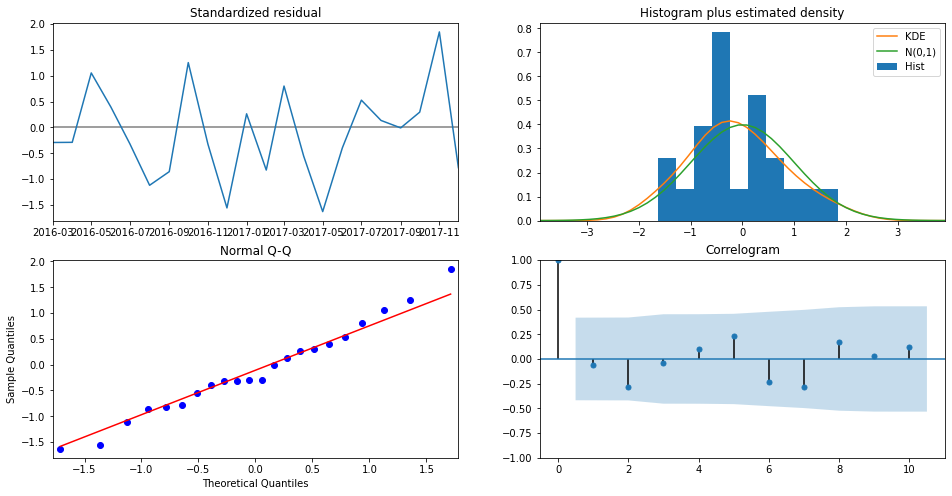

In [ ]:
resultados.plot_diagnostics(figsize=(16,8))
plt.show()

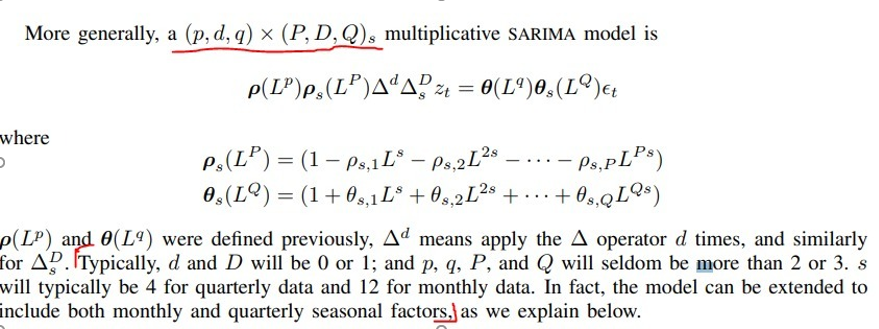